In [2]:
import numpy as np
import pandas as pd
import root_numpy as rn
import matplotlib.pyplot as plt

import matplotlib

matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.weight'] = 'bold'
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16

%matplotlib inline

/Library/Python/2.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.12.1 is currently installed but you installed root_numpy against numpy 1.8.0rc1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [3]:
f = 'Files/QUALITY.root'

t = rn.root2array(f,treename='tree')
df0 = pd.DataFrame(t)
df = df0.query('mc_st_y > -990 & mc_st_x < 10000')

In [4]:
#df_test = df.query('complete < 0.3')
#for i in xrange(len(df_test.complete.values)):
#    print df_test.event.values[i], df_test.complete.values[i]

In [5]:
def makePurPlots(var,xmin,xmax,nbins=50,xlabel='',gmin=0,gmax=0):
        
    mean = np.mean(df0[var].values)
    sigma = np.std(df0[var].values)
    
    plt.figure()
    _,_,_ = plt.hist(df0[var].values,bins=nbins,color='b',histtype='stepfilled',\
         alpha=0.6,range=(xmin,xmax))
    if var =='purity':
        plt.text(.13, 300, 'Ave Purity \n$\mu$ = %.2f' % \
                (mean),fontsize=16,bbox={'facecolor':'white','pad':10})
    if var =='complete':
        plt.text(.13, 300, 'Ave Completeness \n$\mu$ = %.2f' % \
                (mean),fontsize=16,bbox={'facecolor':'white','pad':10})

        
    plt.yscale('log')
    plt.grid(True)
    plt.xlabel(xlabel,fontsize=16,weight='bold')
    plt.legend()
    plt.savefig('Plots/ShowerQuality_%s.png'%var, bbox_inches='tight')


/Library/Python/2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


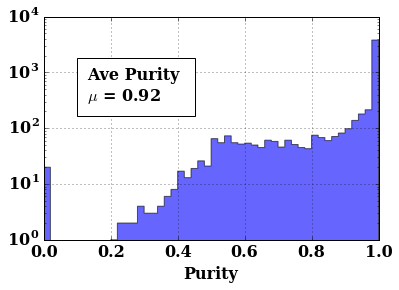

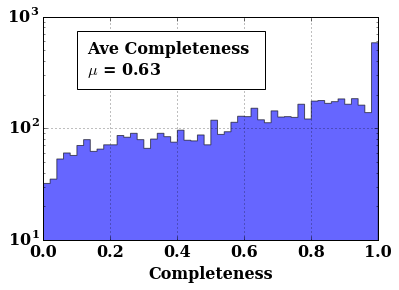

In [5]:
makePurPlots('purity',0,1,xlabel='Purity',gmin=0,gmax=1)
makePurPlots('complete',0,1,xlabel='Completeness',gmin=0,gmax=1)



In [6]:
print df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4101 entries, 1 to 5756
Data columns (total 17 columns):
event           4101 non-null int32
purity          4101 non-null float32
complete        4101 non-null float32
cw_purity       4101 non-null float32
cw_complete     4101 non-null float32
origin          4101 non-null float32
type            4101 non-null float32
from_pi0        4101 non-null int8
st_x            4101 non-null float32
st_y            4101 non-null float32
st_z            4101 non-null float32
reco_e          4101 non-null float32
mc_st_x         4101 non-null float32
mc_st_y         4101 non-null float32
mc_st_z         4101 non-null float32
mc_e            4101 non-null float32
mc_detProf_e    4101 non-null float32
dtypes: float32(15), int32(1), int8(1)
memory usage: 292.4 KB
None


In [7]:
from scipy.optimize import curve_fit

def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))


In [17]:
def makePlots(var,xmin,xmax,nbins=50,xlabel='',gmin=0,gmax=0):
            
    plt.figure()
    _,_,_ = plt.hist(df[var].values,bins=nbins,color='b',histtype='stepfilled',\
         alpha=0.6,range=(xmin,xmax))
    if var.split('_')[0] == 'diff' :
        
        mean = np.mean(df[var].values)
        sigma = np.std(df[var].values)

        #r_x = [x for x in df[var].values if (x > -100) ] #mean - sig * std)]
        #r_x = [x for x in r_x if (x < 100) ] #mean + sig * std) ]
        #print np.std(r_x), np.mean(r_x) #, len(r_z)
        
        plt.text(4, 100, '$\mu$=%.2f \n$\sigma$=%.2f' % \
                (mean, sigma),fontsize=16,bbox={'facecolor':'white','pad':10})

    plt.yscale('log')
    plt.grid(True)
    plt.xlabel(xlabel,fontsize=16,weight='bold')
    plt.legend()
    plt.savefig('Plots/ShowerQuality_%s.png'%var, bbox_inches='tight')


In [18]:
df.loc[:,'diff_x'] = df.loc[:,'mc_st_x'] - 0.7 - df.loc[:,'st_x']
df.loc[:,'diff_y'] = df.loc[:,'mc_st_y'] - df.loc[:,'st_y']
df.loc[:,'diff_z'] = df.loc[:,'mc_st_z'] - df.loc[:,'st_z']
df.loc[:,'tot'] = np.sqrt( pow(df.loc[:,'diff_x'],2) + pow(df.loc[:,'diff_y'],2) + pow(df.loc[:,'diff_z'],2))

df.loc[:,'diff_e'] = df.loc[:,'mc_e'] - df.loc[:,'reco_e']
df.loc[:,'eres'] = df.loc[:,'diff_e'] / df.loc[:,'mc_e']

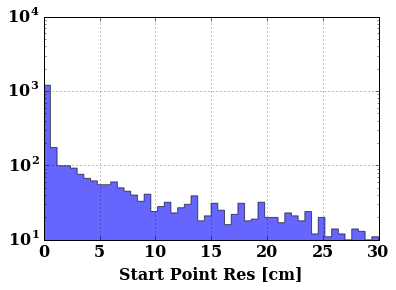

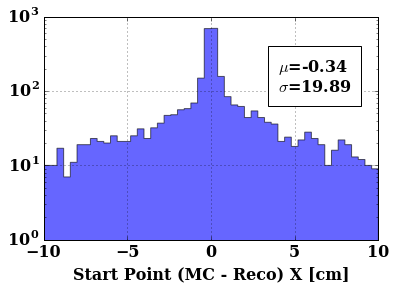

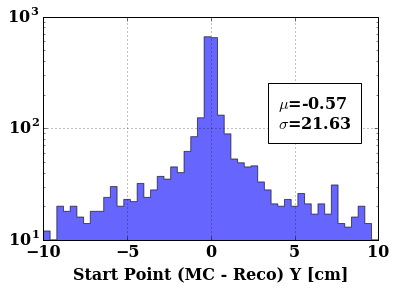

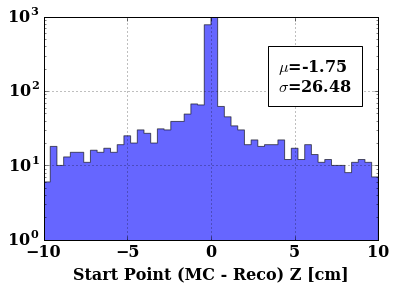

In [20]:
makePlots('tot',0,30,xlabel='Start Point Res [cm]',gmin=-1,gmax=1)

xmin = -10; xmax = 10

makePlots('diff_x',xmin,xmax,xlabel='Start Point (MC - Reco) X [cm]',gmin=-1,gmax=1)
makePlots('diff_y',xmin,xmax,xlabel='Start Point (MC - Reco) Y [cm]',gmin=-1,gmax=1)
makePlots('diff_z',xmin,xmax,xlabel='Start Point (MC - Reco) Z [cm]',gmin=-1,gmax=1)

#makePlots('_reco_start3D',0,50,xlabel='Start Point Res [cm]')
#makePlots('_reco_dot',-1,1,nbins=100,xlabel='MC - Reco Shower Dot Product ')

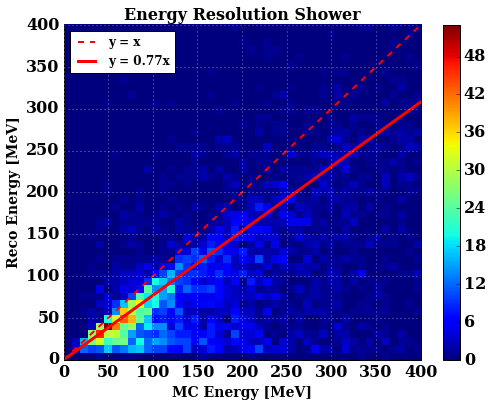

In [23]:
nbins = 45
x = np.linspace(0,400,50)

plt.figure(figsize=(8,6))
plt.hist2d(df['mc_e'].values,df['reco_e'].values,bins=nbins,range=[(0,400),(0,400)])
plt.plot(x,x,lw=2,color='r',ls='--',label='y = x')
plt.plot(x,0.77*x,lw=3,color='r',label='y = 0.77x')
plt.colorbar()
plt.legend(loc=0)
plt.grid(True,c='w')
plt.title('Energy Resolution Shower',fontsize=16,weight='bold')
plt.xlabel('MC Energy [MeV]',fontsize=14,weight='bold')
plt.ylabel('Reco Energy [MeV]',fontsize=14,weight='bold')
#plt.legend(loc='upper left',bbox_to_anchor=(1.0,0.5))
plt.savefig('Plots/ShowerQuality_eres2d.png')

In [24]:
df.loc[:,'diff_e_corr'] = df.loc[:,'mc_e'] - df.loc[:,'reco_e']/0.77
df.loc[:,'eres_corr'] = df.loc[:,'diff_e_corr'] / df.loc[:,'mc_e']


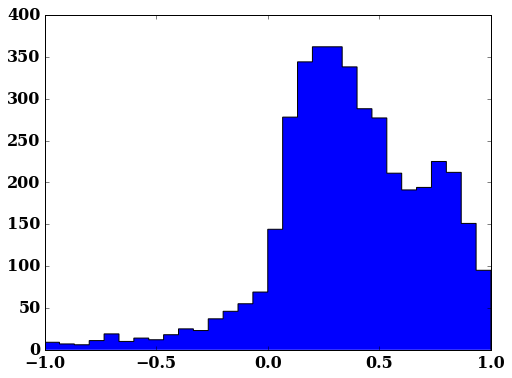

In [25]:
plt.figure(figsize=(8,6))
n_counts, bin_edges, _ = plt.hist(df['eres'].values,bins=30,range=(-1.,1.),histtype='step',fill='b',edgecolor='k')
bins = (bin_edges[:-1] + bin_edges[1:])/2

In [26]:
# Calculate Gaussian distribution
coeff, _ = curve_fit(gauss, bins[14:-7], n_counts[14:-7], p0=([40.,0.2,0.5]))
print coeff

[  3.79241560e+02   2.97971259e-01  -2.08664137e-01]


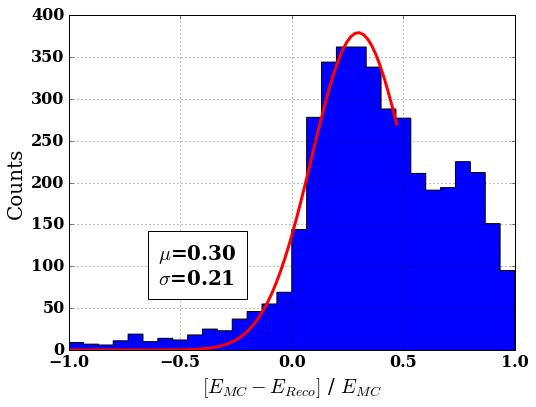

In [27]:
x_g = np.linspace(-1.,.47,80)

plt.figure(figsize=(8,6))
n_counts, bin_edges, _ = plt.hist(df['eres'].values,bins=30,range=(-1.0,1.),histtype='step',fill='b',edgecolor='k')
plt.plot(x_g, gauss(x_g,*coeff), 'r-',label='Gaussian Fit',lw=3)
plt.text(-0.6, 80, '$\mu$=%.2f \n$\sigma$=%.2f' % \
                (coeff[1], -1*coeff[2]),fontsize=20,bbox={'facecolor':'white','pad':10})
#plt.title("Fractional Energy Resolution of Matched Showers",fontsize=20)
plt.xlabel("$[E_{MC} - E_{Reco}]$ / $E_{MC}$",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.grid(True)
plt.savefig("Plots/ShowerQuality_eres.png")

In [28]:
### TEST AREA

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4101 entries, 1 to 5756
Data columns (total 25 columns):
event           4101 non-null int32
purity          4101 non-null float32
complete        4101 non-null float32
cw_purity       4101 non-null float32
cw_complete     4101 non-null float32
origin          4101 non-null float32
type            4101 non-null float32
from_pi0        4101 non-null int8
st_x            4101 non-null float32
st_y            4101 non-null float32
st_z            4101 non-null float32
reco_e          4101 non-null float32
mc_st_x         4101 non-null float32
mc_st_y         4101 non-null float32
mc_st_z         4101 non-null float32
mc_e            4101 non-null float32
mc_detProf_e    4101 non-null float32
diff_x          4101 non-null float32
diff_y          4101 non-null float32
diff_z          4101 non-null float32
tot             4101 non-null float32
diff_e          4101 non-null float32
eres            4101 non-null float32
diff_e_corr     4101 non

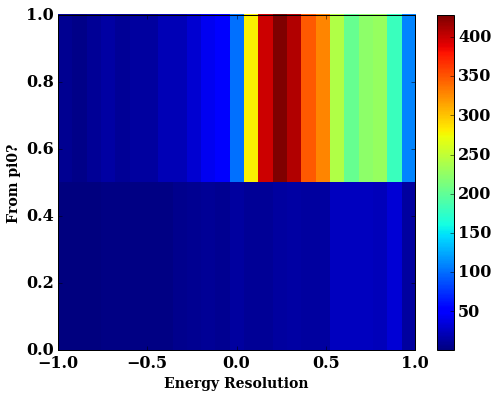

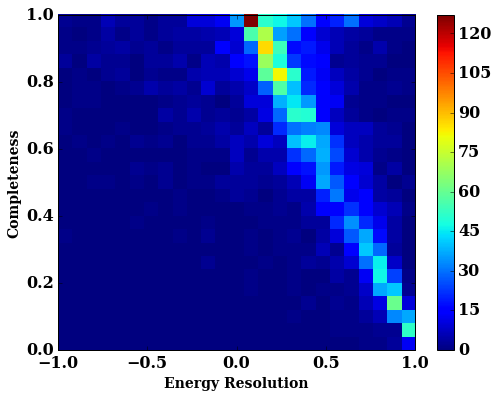

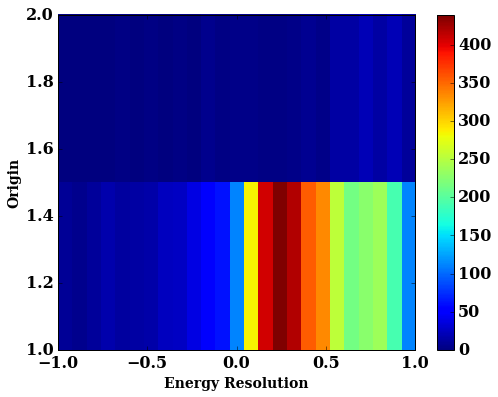

In [42]:
nbins = 25
plt.figure(figsize=(8,6))
plt.hist2d(df['eres'].values,df['from_pi0'].values,bins=(nbins,2),range=[(-1,1),(0,1)])
plt.colorbar()
plt.xlabel('Energy Resolution',fontsize=14,weight='bold')
plt.ylabel('From pi0?',fontsize=14,weight='bold')

nbins = 25
plt.figure(figsize=(8,6))
plt.hist2d(df['eres'].values,df['complete'].values,bins=(nbins,nbins),range=[(-1,1),(0,1)])
plt.colorbar()
plt.xlabel('Energy Resolution',fontsize=14,weight='bold')
plt.ylabel('Completeness',fontsize=14,weight='bold')


nbins = 25
plt.figure(figsize=(8,6))
plt.hist2d(df['eres'].values,df['origin'].values,bins=(nbins,2),range=[(-1,1),(1,2)])
plt.colorbar()
plt.xlabel('Energy Resolution',fontsize=14,weight='bold')
plt.ylabel('Origin',fontsize=14,weight='bold')




In [ ]:
### TEST AREA

[  2.97956332e+02   4.81822903e-02   2.30072331e-01]


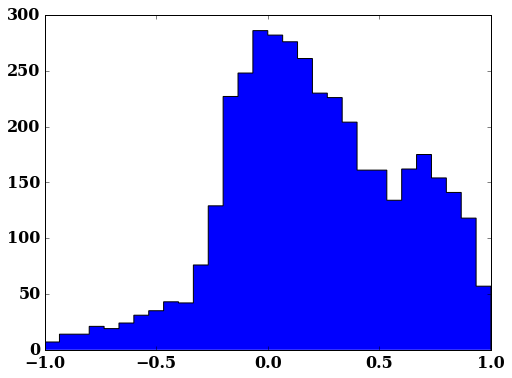

In [38]:
plt.figure(figsize=(8,6))
n_counts, bin_edges, _ = plt.hist(df['eres_corr'].values,bins=30,range=(-1.,1.),histtype='step',fill='b',edgecolor='k')
bins = (bin_edges[:-1] + bin_edges[1:])/2

# Calculate Gaussian distribution
#coeff, _ = curve_fit(gauss, bins[10:21], n_counts[10:21], p0=([140.,0,0.3]))
coeff, _ = curve_fit(gauss, bins[8:19], n_counts[8:19], p0=([100.,0,0.3]))
print coeff

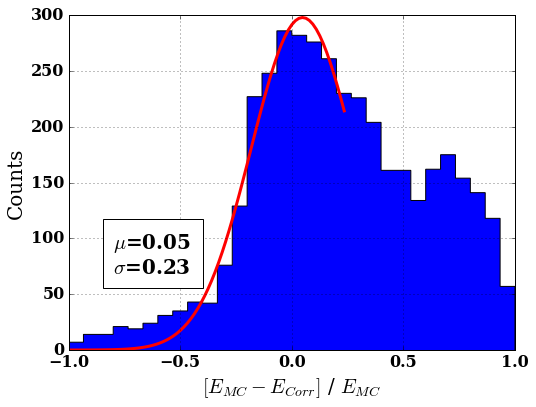

In [39]:
x_g = np.linspace(-1.,.235,80)

plt.figure(figsize=(8,6))
n_counts, bin_edges, _ = plt.hist(df['eres_corr'].values,bins=30,range=(-1.0,1.),histtype='step',fill='b',edgecolor='k')
plt.plot(x_g, gauss(x_g,*coeff), 'r-',label='Gaussian Fit',lw=3)
plt.text(-0.8, 70, '$\mu$=%.2f \n$\sigma$=%.2f' % \
                (coeff[1], 1*coeff[2]),fontsize=20,bbox={'facecolor':'white','pad':10})
#plt.title("Fractional Energy Resolution of Matched Showers",fontsize=20)
plt.xlabel("$[E_{MC} - E_{Corr}]$ / $E_{MC}$",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.grid(True)
plt.savefig("Plots/ShowerQuality_eres_corr.png")

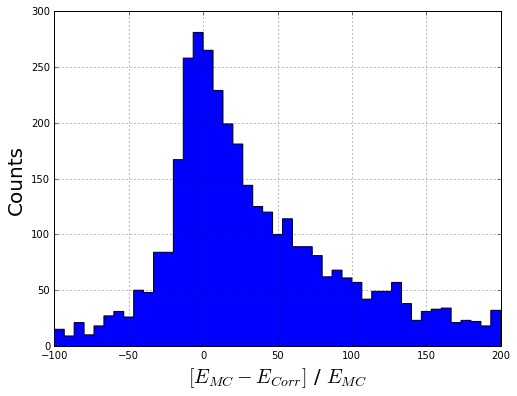

In [58]:
#x_g = np.linspace(-1.,.235,80)

plt.figure(figsize=(8,6))
n_counts, bin_edges, _ = plt.hist(df['diff_e_corr'].values,bins=45,range=(-100,200),histtype='step',fill='b',edgecolor='k')
#plt.plot(x_g, gauss(x_g,*coeff), 'r-',label='Gaussian Fit',lw=3)
#plt.text(-0.8, 70, '$\mu$=%.2f \n$\sigma$=%.2f' % \
#                (coeff[1], 1*coeff[2]),fontsize=20,bbox={'facecolor':'white','pad':10})
#plt.title("Fractional Energy Resolution of Matched Showers",fontsize=20)
plt.xlabel("$[E_{MC} - E_{Corr}]$ / $E_{MC}$",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.grid(True)
plt.savefig("Plots/ShowerQuality_e_corr.png")

In [71]:
# Investiage the weird bump at 0.65

df_inv = df.query('eres_corr > 0.55 & eres_corr < 0.9')
df_oth = df.query('eres_corr < 0.1')

print df_inv.shape

(793, 25)


In [72]:
#df_oth.head()

,event,purity,complete,cw_purity,cw_complete,origin,type,from_pi0,st_x,st_y,...,mc_e,mc_detProf_e,diff_x,diff_y,diff_z,tot,diff_e,eres,diff_e_corr,eres_corr
1,10,0.5,0.428571,0.447010,0.535459,1.0,0.0,0,109.130035,59.946331,...,67.647507,73.004898,2.686592,-19.888783,0.798157,20.085279,-19.802895,-0.292737,-45.924446,-0.678879
2,18,1.0,0.785433,0.999994,0.851405,1.0,1.0,1,80.686028,-20.247622,...,971.872986,869.925659,0.372780,-5.737288,-9.895569,11.444550,231.209717,0.237901,9.972595,0.010261
3,18,1.0,0.636364,0.999837,0.718753,1.0,1.0,0,92.219643,-51.424538,...,22.813177,24.934631,10.500656,-6.453053,18.457947,22.194628,4.888407,0.214280,-0.465746,-0.020416
5,35,1.0,0.919540,0.999980,0.896598,1.0,1.0,1,93.111130,-33.930824,...,127.761635,100.476494,0.737381,-0.071373,0.140564,0.754044,37.672813,0.294868,10.763161,0.084244
8,40,1.0,0.930233,0.999979,0.959477,1.0,1.0,1,95.663452,-53.849407,...,98.606804,87.257622,0.666214,-0.048420,0.082199,0.673010,14.883362,0.150936,-10.124939,-0.102680


(array([  8.,  14.,  53.,  62.,  73.,  64.,  69.,  75.,  55.,  57.,  49.,
         30.,  26.,  17.,  15.,  17.,  13.,   8.,   7.,  13.,   2.,   1.,
          4.,   4.,   3.,   6.,   5.,   4.,   6.,  33.]),
 array([ 0.0320197 ,  0.06428571,  0.09655172,  0.12881773,  0.16108374,
         0.19334975,  0.22561576,  0.25788177,  0.29014778,  0.32241379,
         0.3546798 ,  0.38694581,  0.41921182,  0.45147783,  0.48374384,
         0.51600985,  0.54827586,  0.58054187,  0.61280788,  0.64507389,
         0.6773399 ,  0.70960591,  0.74187192,  0.77413793,  0.80640394,
         0.83866995,  0.87093596,  0.90320197,  0.93546798,  0.96773399,  1.        ]),
 <a list of 30 Patch objects>)

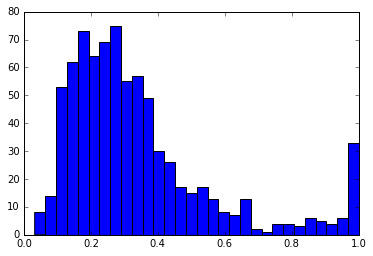

In [74]:
plt.hist(df_inv.complete.values,bins=30)